In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics 
np.random.seed(0)

In [2]:
datos=pd.read_csv("../Data/SCADA_data_WT2339.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.DataFrame({'date_time': datos['date_time'] ,'TempEjeLento_1': datos['TempEjeLento_1'], 'TempAmbMean': datos['TempAmbMean'], 'TempRodamMultipMean': datos['TempRodamMultipMean'], 'TempCojLAMean': datos['TempCojLAMean'],'TempCojLOAMean': datos['TempCojLOAMean'], 'TempGenMean': datos['TempGenMean'], 'PotMean': datos['PotMean'], 'VelRotorMean': datos['VelRotorMean']})
cols = df.columns.tolist()

In [5]:
#PotMean
df['PotMean'][df['PotMean']< 0] = None
df['PotMean'][df['PotMean']> 2000] = None
#TempAmbMean
df['TempAmbMean'][df['TempAmbMean']< -5] = None
df['TempAmbMean'][df['TempAmbMean']> 40] = None
#TempCojLAMean
df['TempCojLAMean'][df['TempCojLAMean']< 0] = None
df['TempCojLAMean'][df['TempCojLAMean']> 120] = None
#TempCojLOAMean
df['TempCojLOAMean'][df['TempCojLOAMean']< 0] = None
df['TempCojLOAMean'][df['TempCojLOAMean']> 120] = None
#TempEjeLento_1
df['TempEjeLento_1'][df['TempEjeLento_1']< 0] = None
df['TempEjeLento_1'][df['TempEjeLento_1']> 120] = None
#TempGenMean
df['TempGenMean'][df['TempGenMean']< 0] = None
df['TempGenMean'][df['TempGenMean']> 175] = None
#TempRodamMultipMean
df['TempRodamMultipMean'][df['TempRodamMultipMean']< 0] = None
df['TempRodamMultipMean'][df['TempRodamMultipMean']> 120] = None
#VelRotorMean
df['VelRotorMean'][df['VelRotorMean']< 0] = None
df['VelRotorMean'][df['VelRotorMean']> 50] = None

In [6]:
df['TempAmbMean']=df['TempAmbMean'].interpolate(method='pchip', order=3, limit_area='inside')
df['TempAmbMean']=df['TempAmbMean'].fillna(method='backfill')
df['TempAmbMean']=df['TempAmbMean'].fillna(method='ffill')

df['TempEjeLento_1']=df['TempEjeLento_1'].interpolate(method='pchip', order=3)
df['TempEjeLento_1']=df['TempEjeLento_1'].fillna(method='backfill')

df['TempRodamMultipMean']=df['TempRodamMultipMean'].interpolate(method='pchip', order=3)
df['TempRodamMultipMean']=df['TempRodamMultipMean'].fillna(method='backfill')

df['TempCojLAMean']=df['TempCojLAMean'].interpolate(method='pchip', order=3)
df['TempCojLAMean']=df['TempCojLAMean'].fillna(method='backfill')

df['TempCojLOAMean']=df['TempCojLOAMean'].interpolate(method='pchip', order=3)
df['TempCojLOAMean']=df['TempCojLOAMean'].fillna(method='backfill')

df['TempGenMean']=df['TempGenMean'].interpolate(method='pchip', order=3)
df['TempGenMean']=df['TempGenMean'].fillna(method='backfill')

df['PotMean']=df['PotMean'].interpolate(method='pchip', order=3)
df['PotMean']=df['PotMean'].fillna(method='backfill')

df['VelRotorMean']=df['VelRotorMean'].interpolate(method='pchip', order=3)
df['VelRotorMean']=df['VelRotorMean'].fillna(method='backfill')

df['TempEjeLento_1']=df['TempEjeLento_1'].fillna(method='ffill')
df['TempRodamMultipMean']=df['TempRodamMultipMean'].fillna(method='ffill')
df['TempCojLAMean']=df['TempCojLAMean'].fillna(method='ffill')
df['TempCojLOAMean']=df['TempCojLOAMean'].fillna(method='ffill')
df['TempGenMean']=df['TempGenMean'].fillna(method='ffill')
df['PotMean']=df['PotMean'].fillna(method='ffill')
df['VelRotorMean']=df['VelRotorMean'].fillna(method='ffill')

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
datos_listos=df.copy()

In [9]:
datos_t=pd.DataFrame({ 'TempEjeLento_1':df['TempEjeLento_1'],'date_time': df['date_time'] ,})
datos_t.drop([0], inplace=True)
datos_t.reset_index(drop=True, inplace=True)
datos_t

,TempEjeLento_1,date_time
0,2.197280e+01,2013-01-01 00:10:00.0
1,2.197280e+01,2013-01-01 00:20:00.0
2,2.197280e+01,2013-01-01 00:30:00.0
3,2.197280e+01,2013-01-01 00:40:00.0
4,2.197280e+01,2013-01-01 00:50:00.0
...,...,...
357984,-4.154819e+08,2019-10-28 00:10:00.0
357985,-4.155084e+08,2019-10-28 00:20:00.0
357986,-4.155348e+08,2019-10-28 00:30:00.0
357987,-4.155613e+08,2019-10-28 00:40:00.0


In [10]:
datos_tmenos1=pd.DataFrame({'TempEjeLento_1-1': df['TempEjeLento_1'],'TempAmbMean-1': df['TempAmbMean'], 'TempRodamMultipMean-1': df['TempRodamMultipMean'],'TempCojLOAMean-1': df['TempCojLOAMean'], 'TempGenMean-1': df['TempGenMean'], 'PotMean-1': df['PotMean'], 'VelRotorMean-1': df['VelRotorMean']})
datos_tmenos1.drop([len(df['VelRotorMean'])-1], inplace=True)
datos_tmenos1.reset_index(drop=True, inplace=True)
datos_tmenos1

,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1
0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
1,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
2,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
3,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
4,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
...,...,...,...,...,...,...,...
357984,-4.154555e+08,19.34880,57.1155,37.8026,57.4909,149.905,11.6041
357985,-4.154819e+08,19.28660,57.9033,37.8422,58.0973,187.893,12.0709
357986,-4.155084e+08,19.22430,58.6912,37.8818,58.7037,192.204,12.0428
357987,-4.155348e+08,19.16210,59.4790,37.9214,59.1127,170.627,11.7507


In [11]:
datos_listos=pd.DataFrame({'date_time': datos_t['date_time'], 'TempEjeLento_1-1': datos_tmenos1['TempEjeLento_1-1'],'TempAmbMean-1': datos_tmenos1['TempAmbMean-1'],'TempRodamMultipMean-1': datos_tmenos1['TempRodamMultipMean-1'],'TempCojLOAMean-1': datos_tmenos1['TempCojLOAMean-1'],'TempGenMean-1': datos_tmenos1['TempGenMean-1'], 'PotMean-1': datos_tmenos1['PotMean-1'], 'VelRotorMean-1': datos_tmenos1['VelRotorMean-1'],'TempEjeLento_1': datos_t['TempEjeLento_1']})
datos_listos

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2013-01-01 00:10:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
1,2013-01-01 00:20:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
2,2013-01-01 00:30:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
3,2013-01-01 00:40:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
4,2013-01-01 00:50:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
...,...,...,...,...,...,...,...,...,...
357984,2019-10-28 00:10:00.0,-4.154555e+08,19.34880,57.1155,37.8026,57.4909,149.905,11.6041,-4.154819e+08
357985,2019-10-28 00:20:00.0,-4.154819e+08,19.28660,57.9033,37.8422,58.0973,187.893,12.0709,-4.155084e+08
357986,2019-10-28 00:30:00.0,-4.155084e+08,19.22430,58.6912,37.8818,58.7037,192.204,12.0428,-4.155348e+08
357987,2019-10-28 00:40:00.0,-4.155348e+08,19.16210,59.4790,37.9214,59.1127,170.627,11.7507,-4.155613e+08


In [12]:
def normalizado(df,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17):
    

        datos_norm=pd.DataFrame({"date_time": df['date_time']})
        datos_norm["TempEjeLento_1-1"] = (df['TempEjeLento_1-1']-b1)/(a1-b1)
        datos_norm["TempAmbMean-1"]= (df['TempAmbMean-1']-b2)/(a2-b2)
        datos_norm["TempRodamMultipMean-1"] = (df['TempRodamMultipMean-1']-b6)/(a6-b6)
        #datos_norm["TempCojLAMean-1"] = (df['TempCojLAMean-1']-b8)/(a8-b8) 
        datos_norm["TempCojLOAMean-1"] = (df['TempCojLOAMean-1']-b10)/(a10-b10) 
        datos_norm["TempGenMean-1"] = (df['TempGenMean-1']-b12)/(a12-b12)
        datos_norm["PotMean-1"] = (df['PotMean-1']-b14)/(a14-b14) 
        datos_norm["VelRotorMean-1"] = (df['VelRotorMean-1']-b16)/(a16-b16)
        datos_norm["TempEjeLento_1"] = (df['TempEjeLento_1']-b17)/(a17-b17)
        #datos_norm['date_time'] = df['date_time']

        return datos_norm

In [13]:
from datetime import datetime,timedelta
datos_listos['date_time']=pd.to_datetime(datos_listos['date_time'])

In [14]:
data_tv=datos_listos.copy()
mask = ((data_tv['date_time'] >= '2017-02-06 00:00:00') & (data_tv['date_time'] < '2018-01-01 00:00:00') ) 
train_tv=data_tv.loc[mask]
train_tv.reset_index(drop=True, inplace=True)

In [15]:
longitud=len(train_tv)
#longitud=longitud*70/100
longitud=(longitud)/144
longitud=longitud*90/100
longitud=round(longitud)
longitud=longitud*144
longitud

42624

In [16]:
training=train_tv.loc[0:round(longitud)-1]
training.reset_index(drop=True, inplace=True)
training

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2017-02-06 00:00:00,23.454597,5.29548,67.9703,35.0589,84.2192,1463.170,17.2516,23.461126
1,2017-02-06 00:10:00,23.461126,5.23856,67.9609,34.9657,84.7324,1523.240,17.0297,23.467660
2,2017-02-06 00:20:00,23.467660,5.18163,67.9516,34.8724,85.2455,1525.110,16.9288,23.474198
3,2017-02-06 00:30:00,23.474198,5.12471,67.9422,34.7791,85.7587,1510.910,17.0879,23.480740
4,2017-02-06 00:40:00,23.480740,5.06779,67.9329,34.6858,86.2718,1523.620,16.7273,23.487286
...,...,...,...,...,...,...,...,...,...
42619,2017-11-28 23:10:00,22.570200,9.21998,66.7897,29.5458,52.8007,627.165,16.1957,22.644600
42620,2017-11-28 23:20:00,22.644600,9.23035,66.6943,29.5943,53.4073,668.174,16.5365,22.709300
42621,2017-11-28 23:30:00,22.709300,9.24072,66.5989,29.6428,54.0139,756.345,16.9779,22.774000
42622,2017-11-28 23:40:00,22.774000,9.25109,66.5252,29.6913,54.6205,881.859,17.6032,22.838700


In [17]:
from numpy import array
df=training

a1=df['TempEjeLento_1-1'].values.max()
b1=df['TempEjeLento_1-1'].values.min()
a2=df['TempAmbMean-1'].values.max()
b2=df['TempAmbMean-1'].values.min()
a6=df['TempRodamMultipMean-1'].values.max()
b6=df['TempRodamMultipMean-1'].values.min()
#a8=df['TempCojLAMean-1'].values.max()
#b8=df['TempCojLAMean-1'].values.min()
a10=df['TempCojLOAMean-1'].values.max()
b10=df['TempCojLOAMean-1'].values.min()
a12=df['TempGenMean-1'].values.max()
b12=df['TempGenMean-1'].values.min()
a14=df['PotMean-1'].values.max()
b14=df['PotMean-1'].values.min()
a16=df['VelRotorMean-1'].values.max()
b16=df['VelRotorMean-1'].values.min()
a17=df['TempEjeLento_1'].values.max()
b17=df['TempEjeLento_1'].values.min()

In [18]:
training=normalizado(training,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
training

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2017-02-06 00:00:00,0.451348,0.097159,0.841016,0.324844,0.632134,0.951457,0.945014,0.451580
1,2017-02-06 00:10:00,0.451580,0.095677,0.840852,0.323214,0.637375,0.990519,0.932858,0.451812
2,2017-02-06 00:20:00,0.451812,0.094195,0.840690,0.321583,0.642615,0.991735,0.927331,0.452044
3,2017-02-06 00:30:00,0.452044,0.092713,0.840525,0.319952,0.647857,0.982501,0.936046,0.452277
4,2017-02-06 00:40:00,0.452277,0.091231,0.840363,0.318321,0.653097,0.990766,0.916293,0.452509
...,...,...,...,...,...,...,...,...,...
42619,2017-11-28 23:10:00,0.419938,0.199339,0.820387,0.228460,0.311251,0.407827,0.887173,0.422580
42620,2017-11-28 23:20:00,0.422580,0.199609,0.818720,0.229308,0.317446,0.434494,0.905842,0.424878
42621,2017-11-28 23:30:00,0.424878,0.199879,0.817053,0.230156,0.323641,0.491829,0.930021,0.427176
42622,2017-11-28 23:40:00,0.427176,0.200149,0.815765,0.231004,0.329837,0.573447,0.964274,0.429474


In [19]:
validation=train_tv.loc[round(longitud):len(train_tv)]
validation.reset_index(drop=True, inplace=True)
validation=normalizado(validation,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
validation=normalizado(validation,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
validation

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2017-11-29 00:00:00,-0.366331,-0.035490,-0.332400,-0.284011,-0.224517,3.551666e-04,0.051660,-0.366260
1,2017-11-29 00:10:00,-0.366260,-0.035483,-0.332391,-0.283996,-0.224454,4.304555e-04,0.053740,-0.366195
2,2017-11-29 00:20:00,-0.366195,-0.035476,-0.332382,-0.283982,-0.224391,3.683418e-04,0.052945,-0.366131
3,2017-11-29 00:30:00,-0.366131,-0.035469,-0.332373,-0.283967,-0.224327,3.378267e-04,0.052161,-0.366067
4,2017-11-29 00:40:00,-0.366067,-0.035462,-0.332363,-0.283952,-0.224292,3.893250e-04,0.053640,-0.366003
...,...,...,...,...,...,...,...,...,...
4747,2017-12-31 23:10:00,-0.372426,-0.038153,-0.336014,-0.282081,-0.221441,2.914076e-05,0.008195,-0.372670
4748,2017-12-31 23:20:00,-0.372670,-0.038191,-0.336467,-0.282139,-0.221677,4.116001e-07,0.001345,-0.372914
4749,2017-12-31 23:30:00,-0.372914,-0.038229,-0.336853,-0.282213,-0.221914,3.992257e-07,0.001091,-0.373169
4750,2017-12-31 23:40:00,-0.373169,-0.038267,-0.337238,-0.282373,-0.222150,3.868518e-07,0.000995,-0.373485


In [20]:
test=datos_listos.copy()
mask = ((test['date_time'] >= '2018-01-01 00:00:00') & (test['date_time'] < '2018-12-01 00:00:00')) 
test=test.loc[mask]
test.reset_index(drop=True, inplace=True)
test=normalizado(test,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
test

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2018-01-01 00:00:00,0.221229,0.091105,0.495597,0.306660,0.537299,0.000557,0.019991,0.212105
1,2018-01-01 00:10:00,0.212105,0.089639,0.473538,0.296798,0.527147,0.000545,0.011979,0.202985
2,2018-01-01 00:20:00,0.202985,0.088172,0.451481,0.286934,0.516994,0.000527,0.017928,0.193861
3,2018-01-01 00:30:00,0.193861,0.086705,0.429422,0.277072,0.506841,0.000509,0.022091,0.185394
4,2018-01-01 00:40:00,0.185394,0.085238,0.407379,0.267210,0.496688,0.000491,0.022888,0.178582
...,...,...,...,...,...,...,...,...,...
47803,2018-11-30 23:10:00,0.305608,0.116605,0.587952,0.126475,0.212243,0.040475,0.638326,0.304028
47804,2018-11-30 23:20:00,0.304028,0.116073,0.587146,0.125982,0.211926,0.058854,0.637324,0.302451
47805,2018-11-30 23:30:00,0.302451,0.115541,0.579079,0.125489,0.211608,0.051025,0.640309,0.300476
47806,2018-11-30 23:40:00,0.300476,0.115008,0.567499,0.124996,0.211290,0.027133,0.643010,0.298111


In [21]:
from numpy import array
from numpy import hstack

def datosstack(data):
    
        X1 = array(data['TempAmbMean-1'])
        X2 = array(data['TempRodamMultipMean-1'])
        #X3 = array(data['TempCojLAMean-1'])
        X3 = array(data['TempCojLOAMean-1'])
        X4 = array(data['TempGenMean-1'])
        X5 = array(data['PotMean-1'])
        X6 = array(data['VelRotorMean-1'])
        X7 = array(data['TempEjeLento_1-1'])
        X8 = array(data['TempEjeLento_1'])

        X1 = X1.reshape((len(X1), 1))
        X2 = X2.reshape((len(X2), 1))
        X3 = X3.reshape((len(X3), 1))
        X4 = X4.reshape((len(X4), 1))
        X5 = X5.reshape((len(X5), 1))
        X6 = X6.reshape((len(X6), 1))
        X7 = X7.reshape((len(X7), 1))
        X8 = X8.reshape((len(X8), 1))
        #X9 = X8.reshape((len(X9), 1))
        
        dataset = hstack((X1, X2, X3, X4, X5, X6, X7, X8))            

        return dataset 

In [22]:
dataset_train=datosstack(training)
dataset_validation=datosstack(validation)
dataset_test=datosstack(test)

dataset_train.shape

(42624, 8)

In [23]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        #end_ix = n_steps*i + n_steps
        end_ix = i + n_steps
        #start_ix = end_ix - n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
            # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [24]:
n_steps = 1
xtrain, ytrain = split_sequences(dataset_train, n_steps)
print(xtrain.shape, ytrain.shape)

(42624, 1, 7) (42624,)


In [25]:
xvalidation, yvalidation = split_sequences(dataset_validation, n_steps)
print(xvalidation.shape, yvalidation.shape)

(4752, 1, 7) (4752,)


In [26]:
xtest, ytest = split_sequences(dataset_test, n_steps)
print(xtest.shape, ytest.shape)

(47808, 1, 7) (47808,)


## Creación del modelo

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import RepeatedKFold, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [28]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    #x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = inputs
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [29]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [30]:
xtrain.shape

(42624, 1, 7)

In [31]:
def create_model():
    input_shape = xtrain.shape[1:]

    model = build_model(
        input_shape,
        head_size=256,
        num_heads=4,
        ff_dim=4,
        num_transformer_blocks=4,
        mlp_units=[100],
        mlp_dropout=0.4,
        dropout=0.3,
    )
    
    model.compile(loss="mean_squared_error",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3)
    )
    
    return(model)

estimator = KerasRegressor(build_fn=create_model, verbose=0)

In [32]:
callbacks = [keras.callbacks.EarlyStopping(patience=20, \
    restore_best_weights=True)]

# Tuning con grid search

from sklearn.model_selection import GridSearchCV

In [33]:
model = create_model()

In [34]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [35]:
btscv = BlockingTimeSeriesSplit(n_splits=5)

In [36]:
loss_df = pd.DataFrame()
val_loss_df = pd.DataFrame()

In [37]:
fold_num = 1
for train_index, test_index in btscv.split(xtrain):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = xtrain[train_index], xtrain[test_index]
    y_train, y_test = ytrain[train_index], ytrain[test_index]
    
    history = model.fit(
        X_train,
        y_train,
        validation_data = (X_test, y_test),
        epochs=100,
        batch_size=64
        #callbacks=callbacks,
    )
    
    loss_df['Loss ' + str(fold_num)] = history.history['loss']
    val_loss_df['Val_loss ' + str(fold_num)] = history.history['val_loss']
    
    fold_num += 1

TRAIN: [   0    1    2 ... 6816 6817 6818] TEST: [6819 6820 6821 ... 8521 8522 8523]
Epoch 1/100
107/107 [==============================] - 9s 26ms/step - loss: 0.0292 - val_loss: 0.0025
Epoch 2/100
107/107 [==============================] - 2s 23ms/step - loss: 0.0086 - val_loss: 0.0011
Epoch 3/100
107/107 [==============================] - 3s 26ms/step - loss: 0.0062 - val_loss: 2.9066e-04
Epoch 4/100
107/107 [==============================] - 3s 26ms/step - loss: 0.0050 - val_loss: 4.2361e-04
Epoch 5/100
107/107 [==============================] - 3s 26ms/step - loss: 0.0045 - val_loss: 5.8545e-04
Epoch 6/100
107/107 [==============================] - 3s 27ms/step - loss: 0.0040 - val_loss: 3.7655e-04
Epoch 7/100
107/107 [==============================] - 3s 26ms/step - loss: 0.0039 - val_loss: 4.8636e-04
Epoch 8/100
107/107 [==============================] - 3s 25ms/step - loss: 0.0034 - val_loss: 2.4149e-04
Epoch 9/100
107/107 [==============================] - 3s 26ms/step - loss:

Epoch 75/100
107/107 [==============================] - 3s 26ms/step - loss: 3.5787e-04 - val_loss: 1.5340e-05
Epoch 76/100
107/107 [==============================] - 3s 26ms/step - loss: 3.8260e-04 - val_loss: 7.5485e-05
Epoch 77/100
107/107 [==============================] - 3s 26ms/step - loss: 3.7211e-04 - val_loss: 5.2252e-05
Epoch 78/100
107/107 [==============================] - 3s 26ms/step - loss: 3.4665e-04 - val_loss: 1.3591e-05
Epoch 79/100
107/107 [==============================] - 3s 26ms/step - loss: 3.5038e-04 - val_loss: 2.7682e-05
Epoch 80/100
107/107 [==============================] - 3s 26ms/step - loss: 3.5557e-04 - val_loss: 3.8961e-05
Epoch 81/100
107/107 [==============================] - 3s 26ms/step - loss: 3.7750e-04 - val_loss: 9.3550e-06
Epoch 82/100
107/107 [==============================] - 3s 26ms/step - loss: 3.5265e-04 - val_loss: 1.6916e-05
Epoch 83/100
107/107 [==============================] - 3s 26ms/step - loss: 3.4987e-04 - val_loss: 3.6305e-05
E

107/107 [==============================] - 3s 26ms/step - loss: 2.7022e-04 - val_loss: 4.2088e-04
Epoch 49/100
107/107 [==============================] - 3s 24ms/step - loss: 2.6806e-04 - val_loss: 2.2561e-05
Epoch 50/100
107/107 [==============================] - 3s 25ms/step - loss: 3.3298e-04 - val_loss: 4.4830e-05
Epoch 51/100
107/107 [==============================] - 3s 26ms/step - loss: 2.7747e-04 - val_loss: 3.1228e-04
Epoch 52/100
107/107 [==============================] - 3s 24ms/step - loss: 2.8642e-04 - val_loss: 1.4402e-04
Epoch 53/100
107/107 [==============================] - 3s 25ms/step - loss: 2.6415e-04 - val_loss: 2.3223e-04
Epoch 54/100
107/107 [==============================] - 3s 26ms/step - loss: 2.9791e-04 - val_loss: 1.1140e-04
Epoch 55/100
107/107 [==============================] - 3s 26ms/step - loss: 2.9405e-04 - val_loss: 1.3959e-05
Epoch 56/100
107/107 [==============================] - 3s 26ms/step - loss: 2.7318e-04 - val_loss: 2.5406e-05
Epoch 57/100
1

Epoch 95/100
107/107 [==============================] - 3s 26ms/step - loss: 2.8835e-04 - val_loss: 2.9133e-05
Epoch 96/100
107/107 [==============================] - 3s 26ms/step - loss: 2.7586e-04 - val_loss: 1.5238e-05
Epoch 97/100
107/107 [==============================] - 3s 26ms/step - loss: 2.8765e-04 - val_loss: 3.8326e-05
Epoch 98/100
107/107 [==============================] - 3s 26ms/step - loss: 2.8128e-04 - val_loss: 8.2908e-06
Epoch 99/100
107/107 [==============================] - 3s 26ms/step - loss: 2.7683e-04 - val_loss: 7.7697e-06
Epoch 100/100
107/107 [==============================] - 3s 26ms/step - loss: 2.9971e-04 - val_loss: 4.8138e-06
TRAIN: [25572 25573 25574 ... 32388 32389 32390] TEST: [32391 32392 32393 ... 34093 34094 34095]
Epoch 1/100
107/107 [==============================] - 3s 26ms/step - loss: 4.9552e-04 - val_loss: 1.6046e-04
Epoch 2/100
107/107 [==============================] - 3s 26ms/step - loss: 3.7972e-04 - val_loss: 1.7468e-04
Epoch 3/100
107/

107/107 [==============================] - 3s 26ms/step - loss: 3.5052e-04 - val_loss: 3.3636e-04
Epoch 69/100
107/107 [==============================] - 3s 26ms/step - loss: 3.4745e-04 - val_loss: 1.8556e-04
Epoch 70/100
107/107 [==============================] - 3s 26ms/step - loss: 3.3761e-04 - val_loss: 2.4065e-04
Epoch 71/100
107/107 [==============================] - 3s 26ms/step - loss: 3.2049e-04 - val_loss: 1.7903e-04
Epoch 72/100
107/107 [==============================] - 3s 26ms/step - loss: 3.3832e-04 - val_loss: 1.8148e-04
Epoch 73/100
107/107 [==============================] - 3s 26ms/step - loss: 3.2797e-04 - val_loss: 1.7601e-04
Epoch 74/100
107/107 [==============================] - 3s 25ms/step - loss: 3.5401e-04 - val_loss: 1.9523e-04
Epoch 75/100
107/107 [==============================] - 3s 26ms/step - loss: 3.2953e-04 - val_loss: 1.8253e-04
Epoch 76/100
107/107 [==============================] - 3s 26ms/step - loss: 3.5390e-04 - val_loss: 1.9380e-04
Epoch 77/100
1

batch_size = [32, 64]
epochs = [80,100,120]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=1, cv=btscv)

grid_result = grid.fit(xtrain, ytrain)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

    model.fit(
        xtrain,
        ytrain,
        validation_split=0.2,
        epochs=100,
        batch_size=64,
        callbacks=callbacks,
    )

In [38]:
loss_df

,Loss 1,Loss 2,Loss 3,Loss 4,Loss 5
0,0.029246,0.000684,0.001001,0.000496,0.002090
1,0.008644,0.000576,0.000558,0.000380,0.001149
2,0.006188,0.000365,0.000443,0.000379,0.000797
3,0.005004,0.000296,0.000357,0.000352,0.000675
4,0.004496,0.000302,0.000345,0.000326,0.000653
...,...,...,...,...,...
95,0.000336,0.000295,0.000276,0.000360,0.000506
96,0.000332,0.000319,0.000288,0.000358,0.000516
97,0.000327,0.000271,0.000281,0.000352,0.000527
98,0.000332,0.000252,0.000277,0.000340,0.000501


In [39]:
val_loss_df

,Val_loss 1,Val_loss 2,Val_loss 3,Val_loss 4,Val_loss 5
0,0.002525,0.000037,0.000022,0.000160,0.000008
1,0.001056,0.000166,0.000005,0.000175,0.000060
2,0.000291,0.000187,0.000010,0.000178,0.000085
3,0.000424,0.000057,0.000005,0.000192,0.000031
4,0.000585,0.000055,0.000010,0.000175,0.000019
...,...,...,...,...,...
95,0.000016,0.000100,0.000015,0.000185,0.000008
96,0.000030,0.000087,0.000038,0.000428,0.000037
97,0.000011,0.000026,0.000008,0.000308,0.000044
98,0.000015,0.000058,0.000008,0.000311,0.000017


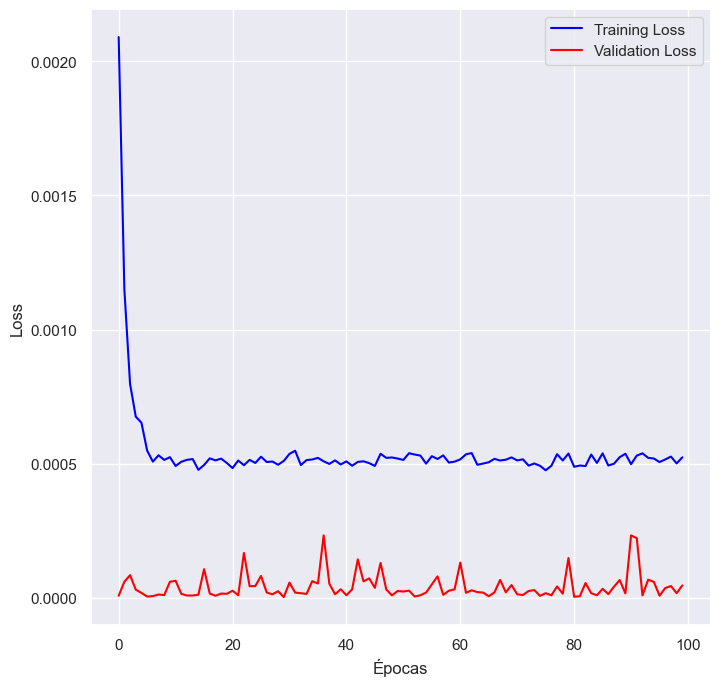

In [40]:
import seaborn as sns
sns.set_theme(palette="ch:s=.25,rot=-.25")
fig,ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=loss_df, x=loss_df.index, y="Loss 5", ax = ax, color="b", label='Training Loss')
sns.lineplot(data=val_loss_df, x=val_loss_df.index, y="Val_loss 5", ax = ax, color="r", label='Validation Loss')
ax.set_xlabel("Épocas")
ax.set_ylabel("Loss")
plt.savefig("test_CV_mala.png")

In [41]:
model.save("../Models/test_CV_mala.h5")